# (ADA) Homework 1: Scoring the Language Model Olympics

---

By the end of this homework, we expect you to be able to:

- Load data and handle data using pandas;
- Navigate the documentation of Python packages by yourself;
- Filter and tidy up noisy real-world datasets;
- Aggregate your data in different (and hopefully helpful) ways;
- Create meaningful visualizations to analyze the data;
- Communicate your findings in a clear and concise manner

---

**Important Dates.**

- Homework release: Fri 04 Oct 2024
- Homework due: Sat 18 Oct 2024, 23:59
- Grade release: Mon 04 Nov 2024

**Some rules**

- You are allowed to use any built-in Python library that comes with Anaconda. If you want to use an external library, you may do so, but must justify your choice.
- Make sure you use the data folder provided in the repository in read-only mode. (Or alternatively, be sure you don’t change any of the files.)
- Be sure to provide a concise textual description of your thought process, the assumptions you made, the solution you implemented, and explanations for your answers. A notebook that only has code cells will not suffice. To avoid confusion: use short comments for longer code answers.
- For questions containing the /Discuss:/ prefix, answer not with code, but with a textual explanation (in markdown).
- Back up any hypotheses and claims with data, since this is an important aspect of the course.
- Please write all your comments in English, and use meaningful variable names in your code. Your repo should have a single notebook (plus the required data files) in the master/main branch. If there are multiple notebooks present, we will not grade anything.
- We will not run your notebook for you! Rather, we will grade it as is, which means that only the results contained in your evaluated code cells will be considered, and we will not see the results in unevaluated code cells. Thus, be sure to hand in a fully-run and evaluated notebook. In order to check whether everything looks as intended, you can check the rendered notebook on the GitHub website once you have pushed your solution there.
- In continuation to the previous point, interactive plots, such as those generated using the ‘plotly’ package, should be strictly avoided! Make sure to print results and/or dataframes that confirm you have properly addressed the task.

**A Note on using Language Models (LMs)**

If you try hard enough, you will likely get away with cheating. Fortunately, our job is not to police, but rather to educate! So, please consider the following:
- Presumably, you are taking this course to learn something! LMs are not always right ([they often fail in silly ways](https://community.openai.com/t/why-9-11-is-larger-than-9-9-incredible/869824/4)). This course should prepare you to detect when they are wrong!
- Some of the TAs on this course literally published many works on detecting machine-generated text.
---

## Context

Context
AI is booming! Newspapers, influencers, and your relatives all agree that AI is important. But while almost everyone agrees that AI is the future, much is unclear about what that future looks like…

Freshly graduated from the EPFL, you are hired by the Swiss government to advise on a large-scale “AI integration” initiative code-named **"NEUTRALITY"** (Navigating Efficient Upgrades Through Robust Artificial Learning Integration Techniques Yearly). Convinced by the stunning progress in language modeling, the government would like to battle the growing shortages in the education sector by using LMs. Your job description: investigate which LMs might be best suited!

You are given the results of three LMs on the [“Massive Multitask Language Understanding (MMLU)”](https://arxiv.org/abs/2009.03300) dataset to compare. This famous dataset consists of 57 subjects with multiple-choice questions, covering diverse subjects like mathematics, computer science, history, and law. Most providers of state-of-the-art LMs use this dataset to showcase the versatility of their latest models. Unfortunately, Horta-Ribeiro, the intern responsible for collecting the results, didn’t take EPFL’s famous ADA course. As a result, the collected datasets are slightly corrupted.

### A very brief primer on Language Models
Language models (LMs) are sophisticated statistical models designed to understand and generate human-like text. At their core, LMs are trained to predict the most likely continuation of a given input text. For example, given the input "The cat sat on the," an LM might predict "mat" as a likely continuation.
LMs are trained on vast text samples from various sources, including books, websites, and social media. This extensive training allows them to capture patterns and relationships in language, enabling them to generate coherent and contextually appropriate text across a wide range of topics and styles.

While LMs can produce text that appears to be written by intelligent humans, it's important to note that their capabilities can diverge from human intelligence in unexpected ways. They may sometimes generate factually incorrect information or struggle with complex reasoning tasks.

Two key concepts in understanding LMs are:
1. **Tokens**: LMs process text using "tokens" rather than individual characters. Tokens can be words, parts of words, or punctuation marks. For example, the sentence "I love AI!" might be tokenized as ["I", "love", "AI", "!"]. Tokenization is the first step in both training and using an LM.
2. **Context**: The input text provided to an LM is called the "context." This context informs the model's predictions or generations. A longer or more specific context often leads to more accurate and relevant outputs.

[See: Wikipedia entry on language models](https://en.wikipedia.org/wiki/Large_language_model)

###  Files for this assignment
This assignment is divided into three tasks, each of which should bring you a step closer to providing a recommendation toward project NEUTRALITY’s objectives:

- **Task 1**: Inspecting the results and getting your first model ranking
- **Task 2**: Inspecting the underlying data used to generate the results for possible biases
- **Task 3**: Learning about tokens and providing a final recommendation


```
📁 PROJECT_NEUTRALITY
│
├── 📄 analysis.ipynb (the file you're currently reading!)
├── 📄 requirements.txt (install into your environment)
│
├── 📁 task_1
├── 📁 task_2
└── 📁 task_2.5
```   
 

In [1]:
# please make sure you install the packages listed in the requirements.txt file in your environment!
# using pip
# %pip install -r requirements.txt
#
# using Conda:
# conda create --name <env_name> --file requirements.txt
#
# some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.stats import ttest_ind, chi2_contingency

## Task 1 (18 points): What's in an average anyway?

The files needed to complete task 1 can be found in the folder "`data/task_1/`:
```
task_1/
│
├── mmlu_data/
│   └── test.csv
│
└── lm_scores/
    ├── lm_X.csv
    ├── lm_Y.csv
    └── lm_Z.csv
```

We will start by loading, (manually) inspecting, and cleaning the data. Although it doesn't seem "glamorous" (nor is it particularly fun...) - manually inspecting data is extremely important! In fact, it's one of the few things most AI and Data Science researchers agree on :). Next, we will take a first pass on ordering our Olympic podium between three LMs.

### 1.1 (1 pt)
 
Load the subfiles contained in the `mmlu_data` and `lm_scores` folders into separate dataframes:
- `df_test`
- `df_x`
- `df_y`
- `df_z`

for each, print their sizes.

In [2]:
# Folder paths
base_folder='task_1/'
mmlu_folder='mmlu_data/'
lm_folder='lm_scores/'

# Load the data and print the size of each dataframe
df_test = pd.read_csv(os.path.join(base_folder, mmlu_folder, 'test.csv'))
print("Size of df_test : (%d)" % (df_test.size))

df_x = pd.read_csv(os.path.join(base_folder, lm_folder, 'lm_X.csv'))
print("Size of df_x : (%d)" % (df_x.size))

df_y = pd.read_csv(os.path.join(base_folder, lm_folder, 'lm_Y.csv'))
print("Size of df_y : (%d)" % (df_y.size))

df_z = pd.read_csv(os.path.join(base_folder, lm_folder, 'lm_Z.csv'))
print("Size of df_z : (%d)" % (df_z.size))

Size of df_test : (112336)
Size of df_x : (27764)
Size of df_y : (27956)
Size of df_z : (27846)


### 1.2 (4 pt)
Unfortunately, LMs don't always output the format we want. In the column `result`, the value should be one of A, B, C, or D. 

A. For each of the LM score dataframes, use a `value_counts()` operation and print the results. 

B. /Discuss:/ Inspect the results and describe the types of answer formats you see. Besides the "expected" case, you should be able to find at least four unexpected formats.

In [3]:
# A

print("\n==> Value counts for df_x:")
print(df_x['result'].value_counts())

print("\n==> Value counts for df_y:")
print(df_y['result'].value_counts())

print("\n==> Value counts for df_z:")
print(df_z['result'].value_counts())


==> Value counts for df_x:
result
A                                                                                                                 2733
A                                                                                                                 1657
B                                                                                                                 1412
Answer: A                                                                                                         1398
C                                                                                                                 1134
                                                                                                                  ... 
judicial activism, so the answer is A                                                                                1
creating insurmountable obstacles to the founding of factions, so the answer is A                                    1
A congressper

B. It seems that data formats are not consistent, even inside a whole dataset. We expect the result to be only uppercase letters such as A, B, C or D. But we're seeing unexpected answer formats such as :

1. **Answers with Explanations**

These answers contain text along with the correct character. 

Eg:

* question_id: 218 (from lm_X): "is prevented from everting by papillary muscles., so the answer is B"
* question_id: 229 (from lm_Y): "auditory tube opens., so the answer is A"
* question_id: 12046 (from lm_Z): "Murder., so the answer is A"

2. **Answers Prefixed with 'Answer: '**

These answers contain the correct character prefixed with the word 'Answer: '. 

Eg:

* question_id: 21 (from lm_X): Answer: A
* question_id: 83 (from lm_Y): Answer: C
* question_id: 12048 (from lm_Z): Answer: B

3. **Empty Answers**

These entries do not contain anything. 

Eg:

* question_id: 135 (from lm_X):
* question_id: 11097 (from lm_Y):
* question_id: 12130 (from lm_Z):

4. **Answers Like "Not Sure"**

Eg:

* question_id: 17 (from lm_X): Not Sure
* question_id: 9395 (from lm_Y): Not Sure
* question_id: 12045 (from lm_Z): Not Sure

5. **Answers Like "None of the Above"**

Eg:

* question_id: 63 (from lm_X): None of the above
* question_id: 8891 (from lm_Y): None of the above
* question_id: 12111 (from lm_Z): None of the above

6. **Answers with Whitespaces (after the letter)**

Eg:

* question_id: 2 (from lm_X): D 
* question_id: 9 (from lm_Y): C 
* question_id: 10 (from lm_Z): C 

### 1.3 (5 pt)
Oh oh... That doesn't look great. Simply dropping all invalid answers seems overly wasteful, yet fixing all of these looks like a mess! Instead, let's focus for now on fixing just those answers of length < 10 characters that require only a single `str.replace()` operation. 

For example, if the answer looks like `--A--`, we could fix this by using the following simple function:

```
def clean_answer(s, pattern='-'):
    return str(s).replace(pattern, '')

dirty_answer = '--A--'
clean_answer = clean_answer(dirty_answer)
```

A. Filter the three score dataframes to include only answers with less than 10 characters. Make a deep copy of the dataframes as you filter them.

B. Modify the `clean_answer()` example function to clean the answers in the filtered data frames using the `apply()` functionality. Finally, make sure **all remaining answers are one of `A, B, C, or D`.**

C. /Discuss:/ Compare the sizes of the original and filtered data frames. What do you see? Why might this be a problem?

In [4]:
# A

# Filter for answers with length < 10 
df_x_filtered = df_x[(df_x['result'].str.len() < 10)].copy()
df_y_filtered = df_y[(df_y['result'].str.len() < 10)].copy()
df_z_filtered = df_z[(df_z['result'].str.len() < 10)].copy()

# Print the value counts of each filtered dataframe and its size
print("\n==> Value counts for df_x_filtered (%d): " % (df_x_filtered.size))
print(df_x_filtered['result'].value_counts())

print("\n==> Value counts for df_y_filtered (%d): " % (df_y_filtered.size))
print(df_y_filtered['result'].value_counts())

print("\n==> Value counts for df_z_filtered (%d): " % (df_z_filtered.size))
print(df_z_filtered['result'].value_counts())



==> Value counts for df_x_filtered (27018): 
result
A            2733
A            1657
B            1412
Answer: A    1398
C            1134
D            1124
B             793
Answer: B     760
C             622
Answer: D     613
D             596
Answer: C     594
Not Sure       73
Name: count, dtype: int64

==> Value counts for df_y_filtered (27274): 
result
D            2894
Answer: D    1718
C            1701
B            1240
D            1145
A            1008
Answer: C     907
Answer: B     726
C             634
Answer: A     597
B             553
A             428
Not Sure       86
Name: count, dtype: int64

==> Value counts for df_z_filtered (25756): 
result
D            2257
C            2191
B            2127
A            2060
Answer: D     777
Answer: C     748
Answer: B     712
Answer: A     687
C             316
D             314
B             285
A             279
Not Sure      125
Name: count, dtype: int64


In [5]:
# B

# Function to clean up answers by removing unwanted characters 
# Such as 'Answer: ', 'Not Sure', 'nan'
def clean_answer(s, pattern='Answer: '):
    s = str(s).replace(pattern, '').strip()
    if s in ['Not Sure', 'nan', '']:
        return ''
    return s

# Apply the clean_answer function, remove empty answers 
# and print the value counts for each filtered df
df_x_filtered['result'] = df_x_filtered['result'].apply(clean_answer)
df_x_filtered = df_x_filtered[df_x_filtered['result'] != '']
print("\n==> Value counts for df_x_filtered (%d):" % (df_x_filtered.size))
print(df_x_filtered['result'].value_counts().sort_index())

df_y_filtered['result'] = df_y_filtered['result'].apply(clean_answer)
df_y_filtered = df_y_filtered[df_y_filtered['result'] != '']
print("\n==> Value counts for df_y_filtered (%d):" % (df_y_filtered.size))
print(df_y_filtered['result'].value_counts().sort_index())

df_z_filtered['result'] = df_z_filtered['result'].apply(clean_answer)
df_z_filtered = df_z_filtered[df_z_filtered['result'] != '']
print("\n==> Value counts for df_z_filtered (%d):" % (df_z_filtered.size))
print(df_z_filtered['result'].value_counts().sort_index())


==> Value counts for df_x_filtered (26872):
result
A    5788
B    2965
C    2350
D    2333
Name: count, dtype: int64

==> Value counts for df_y_filtered (27102):
result
A    2033
B    2519
C    3242
D    5757
Name: count, dtype: int64

==> Value counts for df_z_filtered (25506):
result
A    3026
B    3124
C    3255
D    3348
Name: count, dtype: int64


C. After pre-processing, we can see that dataset are unbalanced : df_Z_filtered has less elements than the two others. This could implies misleading interpretation either visually or statistically.

### 1.4 (3 pt)

Now that our answer columns are nicely formatted, let's take a look at model performance:

A. Both the `MMLU` dataframes and the language model score data frames have the columns `question_id`. For each of the language model score data frames, use an inner join operation with the `df_test` dataframe on the `question_id` column.

B. Add a new column to each of the resulting dataframes called `correct`, that checks if the model's answer in `result` is the same as the expected answer in the column `answer`. Then, print the average score of each model.

In [6]:
# A

df_x_joined = pd.merge(df_test, df_x_filtered, on='question_id', how='inner')
df_y_joined = pd.merge(df_test, df_y_filtered, on='question_id', how='inner')
df_z_joined = pd.merge(df_test, df_z_filtered, on='question_id', how='inner')

# Print the size of each joined df 
print("Size of df_x_joined : (%d)" % (df_x_joined.size))
print("Size of df_y_joined : (%d)" % (df_y_joined.size))
print("Size of df_z_joined : (%d)" % (df_z_joined.size))

Size of df_x_joined : (120924)
Size of df_y_joined : (121959)
Size of df_z_joined : (114777)


In [7]:
# B

# check if the model's answer is correct then calculate the average score
df_x_joined['correct'] = df_x_joined['result'] == df_x_joined['answer']
df_X_score = df_x_joined['correct'].mean()
print("\n==> Average success for df_x_joined : %.2f" % (df_X_score))

df_y_joined['correct'] = df_y_joined['result'] == df_y_joined['answer']
df_Y_score = df_y_joined['correct'].mean()
print("\n==> Average success for df_y_joined : %.2f" % (df_Y_score))

df_z_joined['correct'] = df_z_joined['result'] == df_z_joined['answer']
df_Z_score = df_z_joined['correct'].mean()
print("\n==> Average success for df_z_joined : %.2f" % (df_Z_score))



==> Average success for df_x_joined : 0.77

==> Average success for df_y_joined : 0.75

==> Average success for df_z_joined : 0.66


### 1.5 (5 pt)

Hmmm, something doesn't seem quite right. Let's investigate how "balanced" this dataset is:

A. For each of the 57 subjects in the MMLU, compare the number of questions answered by each model. Print the subjects for which there is a more than 10% difference.

B. Propose and implement a reasonable way to rebalance the results. (e.g., while throwing away 100% of the results perfectly rebalances the results, it is not reasonable).

C. Finally, print the updated accuracy on the rebalanced data.

**hint:**:
- (A) For a given subject, let model X and model Y have answered 181 and 200 questions respectively. You can consider this a 10% difference from the perspective of X since: (200 - 181) / 181 > 0.10

In [8]:
# A
# Function to check if the difference between two values is greater than 10%. Used to check if the number of answers for each subject 
# not too different from one LM to another
def has_ten_percent_diff(x, y):
    if x == 0 or y == 0:
        return x != y
    return abs(x - y) / min(x, y) > 0.1

# iterate over each subject
for subject in df_test['subject'].unique():
    df_x_subject = df_x_joined[df_x_joined['subject'] == subject]
    df_y_subject = df_y_joined[df_y_joined['subject'] == subject]
    df_z_subject = df_z_joined[df_z_joined['subject'] == subject]
    
    if has_ten_percent_diff(df_x_subject.shape[0], df_y_subject.shape[0]) or \
        has_ten_percent_diff(df_x_subject.shape[0], df_z_subject.shape[0]) or \
        has_ten_percent_diff(df_y_subject.shape[0], df_z_subject.shape[0]):
        print("\n==> Subject : %s" % (subject))


==> Subject : college chemistry

==> Subject : college computer science

==> Subject : computer security

==> Subject : formal logic

==> Subject : high school geography

==> Subject : logical fallacies

==> Subject : medical genetics

==> Subject : moral disputes

==> Subject : moral scenarios


In [9]:
# B

# Keep only the questions that have been answered by all models
df_x_rebalanced = df_x_joined[df_x_joined['question_id'].isin(df_y_joined['question_id']) & df_x_joined['question_id'].isin(df_z_joined['question_id'])]
df_y_rebalanced = df_y_joined[df_y_joined['question_id'].isin(df_x_joined['question_id']) & df_y_joined['question_id'].isin(df_z_joined['question_id'])]
df_z_rebalanced = df_z_joined[df_z_joined['question_id'].isin(df_x_joined['question_id']) & df_z_joined['question_id'].isin(df_y_joined['question_id'])]

# print the size of the rebalanced dfs
print("Size of df_x_rebalanced : (%d)" % (df_x_rebalanced.shape[0]))
print("Size of df_y_rebalanced : (%d)" % (df_y_rebalanced.shape[0]))
print("Size of df_z_rebalanced : (%d)" % (df_z_rebalanced.shape[0]))

Size of df_x_rebalanced : (11793)
Size of df_y_rebalanced : (11793)
Size of df_z_rebalanced : (11793)


Here we choose to rebalance the result by only keeping the questions that are answered by all models. While it is not the only reasonable option (eg. downsampling questions for models to match the model with the least number of questions for each subject), we did it with the purpose to put each model on an equal footing. We lost around 10000 questions in total but expect that the comparison will be easier.

In [10]:
# C

# calculate the accuracy for each model on the rebalanced data
accuracy_x = df_x_rebalanced['correct'].mean()
accuracy_y = df_y_rebalanced['correct'].mean()
accuracy_z = df_z_rebalanced['correct'].mean()

# print the accuracy for each model
print("\n==> The accuracy of rebalanced_df_x is : %.2f" % (accuracy_x))
print("\n==> The accuracy of rebalanced_df_y is : %.2f" % (accuracy_y))
print("\n==> The accuracy of rebalanced_df_z is : %.2f" % (accuracy_z))


==> The accuracy of rebalanced_df_x is : 0.77

==> The accuracy of rebalanced_df_y is : 0.75

==> The accuracy of rebalanced_df_z is : 0.66


## Task 2 (26 points): What do you mean A > D > B > C...?

Nice work! Having successfully inspected, cleaned, and rebalanced the provided data, you head over to director of the government's NEUTRALITY project. Ms. Sakota is happy with your work so far, but worried that the sloppy intern might have done more undetected damage. To be sure, she orders a new set of evaluations of all models on both MMLU and another dataset.

After cleaning up and rebalancing, you are left with the concatenated score files in the second folder `task_2`:
```
task_2/
│
└── lm_scores_mmlu.csv
│
└── lm_scores_other.csv
```

Each has a new column called `model_name`, which is one of `X, Y` or `Z`.



_NOTE: **only** use data from `task_2` and `task_2_5` for this assignment! The values in `lm_scores_mmlu.csv` will NOT be the same as the dataframes you finished in task 1. This is due to "randomness" or "temperature" in language model inference. This can slightly shift around generative results. (Conveniently: it also ensures any mistakes made in Task 1 don't propogate further ;) )_

In [11]:
# PROVIDED CODE
df_mmlu = pd.read_csv('task_2/lm_scores_mmlu.csv')
df_other = pd.read_csv('task_2/lm_scores_other.csv')

### 2.1 (4 pt)

Let's explore the new results:

A. Compute the mean accuracy and standard errors of each model on both datasets and print the results.

B. Then, show your results in a bar plot using standard errors with a 95% confidence interval around the mean. Make sure the plot is easy to read and well annotated.

C. /Discuss:/ the plot you created: (i) can you say that one of the models is the best? (ii) is there anything that seems odd?

In [12]:
# A

# For each model, calculate the average accuracy and the standard error of the mean
mmlu_stats = df_mmlu.groupby('model_name')['correct'].agg(mean='mean', sem='sem')
mmlu_stats.rename(columns={'sem': 'std_error'}, inplace=True)

print("For MMLU dataset we have:")
print( mmlu_stats[['mean', 'std_error']])

other_stats = df_other.groupby('model_name')['correct'].agg(mean='mean', sem='sem')
other_stats.rename(columns={'sem': 'std_error'}, inplace=True)

print("\nFor the other dataset we have:")
print(other_stats[['mean', 'std_error']])

For MMLU dataset we have:
                mean  std_error
model_name                     
X           0.743588   0.004038
Y           0.761542   0.003941
Z           0.655951   0.004393

For the other dataset we have:
                mean  std_error
model_name                     
X           0.787976   0.006668
Y           0.720936   0.007317
Z           0.671721   0.007660


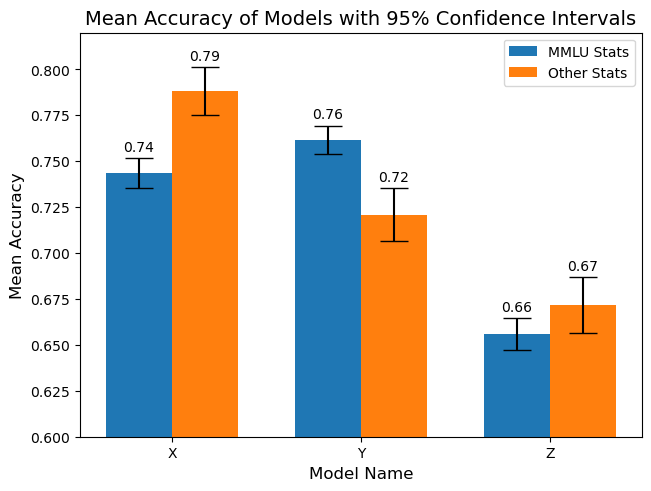

In [13]:
# B

models = ["X", "Y", "Z"]
mmlu_means = mmlu_stats['mean']
other_means = other_stats['mean']

# calculate the 95% confidence interval assuming a normal distribution
mmlu_confidence_interval = 1.96 * mmlu_stats['std_error']
other_confidence_interval = 1.96 * other_stats['std_error']

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(layout='constrained')

# create the bars for each dataset with the confidence intervals
rects1 = ax.bar(x - width/2, mmlu_means, width, label='MMLU Stats', yerr=mmlu_confidence_interval, capsize=10)
rects2 = ax.bar(x + width/2, other_means, width, label='Other Stats', yerr=other_confidence_interval, capsize=10)

# add the labels to the bars for the mean values
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

ax.set_xlabel('Model Name', fontsize=12)
ax.set_ylabel('Mean Accuracy', fontsize=12)
ax.set_title('Mean Accuracy of Models with 95% Confidence Intervals', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(models)

ax.set_ylim(0.60, 0.82)

ax.legend()

C. We cannot say if one model is the best, since for the MMLU dataset Y performed better, while for the other dataset, model X was the best, both taking into account the standard error. This is an odd behaviour, since with the MMLU dataset we can assert with confidence that one Y is better than X, but for the other dataset, X is better than Y - this behavior should be reflected in the confidence intervals.

### 2.2 (5 pt)

Ms. Sakota has assured you that both datasets contain questions of similar difficulty, so, what could be going on here?

A. What is the distribution of correct answers (A, B, C, D) for each dataset? Create a bar chart to visualize this.

B. Perform a chi-square test at $\alpha = 0.05$, of independence to determine if there's a significant difference in the distribution of correct answers between the two datasets. What do you conclude?

**hints**:
- for (A), keep in mind that df_mmlu and df_other contain the results of all models, i.e., the `question_id` column is duplicated.
- for (A), take care to clearly annotate the bar chart, e.g., title, y-label, legend.
- for (B), clearly state the null hypothesis and alternative hypothesis
- use the `chi2_contingency` function from `scipy.stats`
- format your results from answer (A) as a 2D array

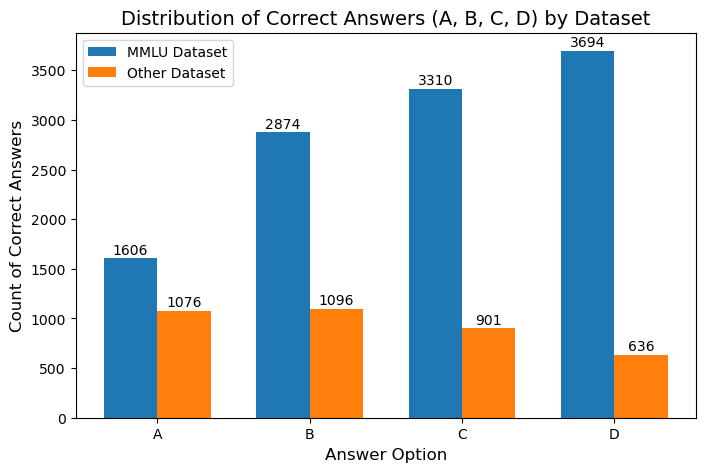

In [14]:
# A

# get the correct answers for each dataset
correct_mmlu = df_mmlu[df_mmlu['correct']]
correct_other = df_other[df_other['correct']]

# drop the duplicates from column question_id
unique_mmlu = correct_mmlu.drop_duplicates(subset='question_id')
unique_other = correct_other.drop_duplicates(subset='question_id')

# count the number of correct answers for each option (A, B, C, D)
mmlu_distribution = unique_mmlu['answer'].value_counts().sort_index()
other_distribution = unique_other['answer'].value_counts().sort_index()

answer_labels = ['A', 'B', 'C', 'D']
x = np.arange(len(answer_labels))  
width = 0.35  

fig, ax = plt.subplots(figsize=(8, 5))

# create the bars for each dataset
rects1 = ax.bar(x - width/2, mmlu_distribution, width, label='MMLU Dataset')
rects2 = ax.bar(x + width/2, other_distribution,  width, label='Other Dataset')

ax.set_xlabel('Answer Option', fontsize=12)
ax.set_ylabel('Count of Correct Answers', fontsize=12)
ax.set_title('Distribution of Correct Answers (A, B, C, D) by Dataset', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(answer_labels)

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)

ax.legend()

In [15]:
# B

# create a 2D array with the distributions of correct answers
answers = [ mmlu_distribution.tolist(), other_distribution.tolist()]

# null hypothesis: the two distributions are independent 
# (there is no significant difference in the distribution of correct answers between the two datasets)
# alternative hypothesis: the two distributions are dependent
# (there is a significant difference in the distribution of correct answers between the two datasets)
res = chi2_contingency(answers)

alpha = 0.05
print(f"Chi-square statistic: {res.statistic}")
print(f"P-value: {res.pvalue}")

# reject the null hypothesis if the p-value is less than the significance level
if res.pvalue < alpha:
    print("\nReject the null hypothesis")
else:
    print("\nFail to reject the null hypothesis")

Chi-square statistic: 623.1752868229951
P-value: 9.531170659204276e-135

Reject the null hypothesis


B. The null hypothesis is that there is no significant difference in the distribution of correct answers between the two datasets, i.e., the two distributions are independent.
The alternative hypothesis is that there is a significant difference.

The conclusion is that we cannot assume the independence of distributions (reject the null hypothesis).

### 2.3 (7 pt)

Let's dive in deeper:

A. What is language model X's mean accuracy conditioned on the four answer options for each dataset?

B. Compare LM X's performance when the correct answer is "A" between the two datasets. Use a T-test with CI = 0.95. What do you conclude?

C. Compare LM X's performance when the correct answer is "A" vs. "C or D" for each dataset. Use a T-test with CI = 0.95. What do you conclude?

In [16]:
# A

options = ['A', 'B', 'C', 'D']

# filter the dataframes for model X
x_model_mmlu = df_mmlu[df_mmlu['model_name'] == 'X']
x_model_other = df_other[df_other['model_name'] == 'X']

print("For model X:")

# calculate the mean accuracy for each option for each dataset
for option in options:
    mean_mmlu = x_model_mmlu[x_model_mmlu['answer'] == option]['correct'].mean()
    mean_other = x_model_other[x_model_other['answer'] == option]['correct'].mean()
    print(f"Answer {option} :")
    print(f"    - Mean accuracy for MMLU dataset: {mean_mmlu:.4f}")
    print(f"    - Mean accuracy for Other dataset: {mean_other:.4f}")

For model X:
Answer A :
    - Mean accuracy for MMLU dataset: 0.9727
    - Mean accuracy for Other dataset: 0.9740
Answer B :
    - Mean accuracy for MMLU dataset: 0.7992
    - Mean accuracy for Other dataset: 0.8065
Answer C :
    - Mean accuracy for MMLU dataset: 0.7079
    - Mean accuracy for Other dataset: 0.6764
Answer D :
    - Mean accuracy for MMLU dataset: 0.6336
    - Mean accuracy for Other dataset: 0.6037


In [17]:
# B

# filter the dataframes for model X and answer A for each dataset
x_model_mmlu_A = x_model_mmlu[x_model_mmlu['answer'] == 'A']['correct']
x_model_other_A = x_model_other[x_model_other['answer'] == 'A']['correct']

# count the number of correct answers for each dataset
x_model_mmlu_A = x_model_mmlu_A.value_counts().sort_index()
x_model_other_A = x_model_other_A.value_counts().sort_index()

res = ttest_ind(x_model_mmlu_A.tolist(),x_model_other_A.tolist())

print("\nFor model X and answer A:")
print(f"    t-statistic: {res.statistic:.4f}")
print(f"    p-value: {res.pvalue:.4f}")
print(f"    Confidence interval: {res.confidence_interval()}")

# reject the null hypothesis if the p-value is less than the significance level
if res.pvalue < 0.05:
    print("    Reject the null hypothesis")
else:
    print("    Fail to reject the null hypothesis")


For model X and answer A:
    t-statistic: 0.2906
    p-value: 0.7987
    Confidence interval: ConfidenceInterval(low=-3679.300580055057, high=4212.300580055056)
    Fail to reject the null hypothesis


The null hypothesis is that there is no significant difference between the performance of the 2 datasets. According to the T-test with CI = 0.95, the p-value is 0.80, which means that the probability of obtaining the observed result under the null hypothesis is 80%, so we fail to reject the null hypothesis, i.e. we cannot say that there is a significant difference between the performance of the 2 datasets.

In [18]:
# C
# For MMLU dataset
x_model_mmlu_C = x_model_mmlu[x_model_mmlu['answer'] == 'C']['correct']
x_model_mmlu_D = x_model_mmlu[x_model_mmlu['answer'] == 'D']['correct']

x_model_mmlu_C = x_model_mmlu_C.value_counts().reindex([True, False], fill_value=0)
x_model_mmlu_D = x_model_mmlu_D.value_counts().reindex([True, False], fill_value=0)

x_model_mmlu_CD = x_model_mmlu_D + x_model_mmlu_C

res = ttest_ind(x_model_mmlu_A.tolist(),x_model_mmlu_CD.tolist())

print("\nFor model X and answer 'A' vs 'C or D' on MMLU dataset:")
print(f"    t-statistic: {res.statistic:.4f}")
print(f"    p-value: {res.pvalue:.4f}")
print(f"    Confidence interval: {res.confidence_interval()}")

if res.pvalue < 0.05:
    print("    Reject the null hypothesis")
else:
    print("    Fail to reject the null hypothesis")


For model X and answer 'A' vs 'C or D' on MMLU dataset:
    t-statistic: -1.9378
    p-value: 0.1922
    Confidence interval: ConfidenceInterval(low=-8905.991842122097, high=3374.9918421220964)
    Fail to reject the null hypothesis


In [19]:
# C
# For Other dataset
x_model_other_C = x_model_other[x_model_other['answer'] == 'C']['correct']
x_model_other_D = x_model_other[x_model_other['answer'] == 'D']['correct']

x_model_other_C = x_model_other_C.value_counts().sort_index()
x_model_other_D = x_model_other_D.value_counts().sort_index()

x_model_other_CD = x_model_other_D + x_model_other_C

res_other = ttest_ind(x_model_other_A.tolist(), x_model_other_CD.tolist())

print("\nFor model X and answer 'A' vs 'C or D' on Other dataset:")
print(f"    t-statistic: {res_other.statistic:.4f}")
print(f"    p-value: {res_other.pvalue:.4f}")

if res_other.pvalue < 0.05:
    print("    Reject the null hypothesis")
else:
    print("    Fail to reject the null hypothesis")


For model X and answer 'A' vs 'C or D' on Other dataset:
    t-statistic: -0.4347
    p-value: 0.7062
    Fail to reject the null hypothesis


In both cases, the null hypothesis is that there is no significant difference between the performance when the correct answer is "A" vs. "C or D". As we can see in the two cells above, the two T-test with CI = 0.95, show that we fail reject the null hypothesis (i.e. for each dataset, we cannot say that there is a significant difference between the performance when the correct answer is "A" vs. "C or D").

### 2.4 (2 pt)

What an intriguing finding! 

A. Print the mean accuracies conditioned on the correct answer for all LMs for each dataset.

B. /Discuss:/ What do you observe?

In [20]:
# A

# Compute mean accuracies conditioned on the correct answer for each model and dataset
def compute_mean_accuracies(df):
    return df.groupby(['model_name', 'answer'])['correct'].mean().unstack()

mean_accuracies_mmlu = compute_mean_accuracies(df_mmlu)
mean_accuracies_other = compute_mean_accuracies(df_other)

print("Mean Accuracies Conditioned on Correct Answer for MMLU Dataset:")
print(mean_accuracies_mmlu)

print("\nMean Accuracies Conditioned on Correct Answer for Other Dataset:")
print(mean_accuracies_other)

Mean Accuracies Conditioned on Correct Answer for MMLU Dataset:
answer             A         B         C         D
model_name                                        
X           0.972688  0.799185  0.707905  0.633592
Y           0.623836  0.688073  0.733470  0.904252
Z           0.643079  0.641182  0.669115  0.661139

Mean Accuracies Conditioned on Correct Answer for Other Dataset:
answer             A         B         C         D
model_name                                        
X           0.974026  0.806452  0.676407  0.603744
Y           0.625232  0.663978  0.762987  0.920437
Z           0.680891  0.667563  0.662338  0.677067


B. Thanks to the mean accuracies conditioned on the correct answer, we can observe that the model X performs much better when the correct answer is A than for the other correct answers whereas the model Y performs much better when the correct answer is D. 
This could suggest that models are biased, meaning that they answer a specific answer (A for X and D for Y) most of the time when they don't know the correct answer. 

### 2.5 (2 pt)

Concerned with your findings so far, you quickly consult with Ms. Sakota. After thinking it over, Ms. Sakota concludes that more tests are needed. She orders a second round of MMLU results. However, the clever Ms. Sakota thinks of the following twist: while keeping questions fixed, she randomly permutes the position of the correct answer. The new results can be found in the folder `data/task_2_5/`:
```
task_2_5/
│
└── lm_scores_mmlu_shuffle.csv
```

/Discuss:/ Why would Ms. Sakota do this?

By doing this, Ms. Sakota is changing the position of the correct answer. She does this to ensure that models don't benefit for answering by default a certain answer position, only having 25% chance of getting it right, instead of more (which seems to happens for Y in MMLU, since there were more answers with the correct option D).

So these changes eliminate, or at least mitigate, the effect of the bias that the models may have toward a certain answer, since all options will now be evenly represented. This is useful to see if the place where the answer is, has an influence or not - obvioulsy it should not have.

### 2.6 (4 pt)

Increasingly sceptical of the language models' performance, you read up on proper testing practices. You stumble upon the concept of [test-rested stability](https://en.wikipedia.org/wiki/Repeatability), which roughtly states that:

"_Measurements taken by a single person or instrument on the same item, under the same conditions, and in a short period of time, should have the same results._"

In our case, we would assume an LM would have the same performance on a given question regardless of the correct answer position. One way of testing this is by using the following metric:

$$\text{test-retest metric} = \frac{1}{N}\sum_{i=1}^N \frac{1}{M}\sum_{j=1}^M c^i_0 c_j^i,$$

where $c^i_0 \in \{0, 1\}$ indicates whether the model answers the $i^{\text{th}}$ question correctly (1 if correct, 0 if incorrect). $c_j^i$ indicates whether the model answers the $i^{\text{th}}$ question correctly in the $j^{\text{th}}$ shuffled version of the answer label content. Finally, $M$ is the total number of shuffles and $N$ is the dataset size.

Task: compute the test-retest metric for each language model using the original `lm_scores_mmlu.csv` file and the new `lm_scores_mmlu_shuffle.csv` file. Using a bar plot, visualize your results by comparing the accuracy of the original `lm_scores_mmlu.csv` and the test-retest scores.

**hints**
- what is $M$ in our case?

(bonus: no points, but so much sweet, sweet knowledge - check out [the following article](https://arxiv.org/pdf/2406.19470v1))

In [21]:
# Import dataset
lm_scores_mmlu_shuffle = pd.read_csv('task_2_5/lm_scores_mmlu_shuffle.csv')

# Utility function to compute the test retest metric. In our case, M = 1.
def calculate_test_retest_metric(df, shuffle_df, model_name):
    df_shuffle = shuffle_df[shuffle_df['model_name'] == model_name]
    df = df[df['model_name'] == model_name]

    df_merged = df.merge(df_shuffle, on='question_id', suffixes=('_original', '_shuffle'))

    test_retest_metric = df_merged[df_merged['correct_original'] & df_merged['correct_shuffle']].shape[0] / df.shape[0]
    return test_retest_metric

In [22]:
test_retest_metric_X = calculate_test_retest_metric(df_mmlu, lm_scores_mmlu_shuffle, 'X')
test_retest_metric_Y = calculate_test_retest_metric(df_mmlu, lm_scores_mmlu_shuffle, 'Y')
test_retest_metric_Z = calculate_test_retest_metric(df_mmlu, lm_scores_mmlu_shuffle, 'Z')

print(f"Test-retest metric for model X: {test_retest_metric_X:.4f}")
print(f"Test-retest metric for model Y: {test_retest_metric_Y:.4f}")
print(f"Test-retest metric for model Z: {test_retest_metric_Z:.4f}")

Test-retest metric for model X: 0.5884
Test-retest metric for model Y: 0.5716
Test-retest metric for model Z: 0.4416


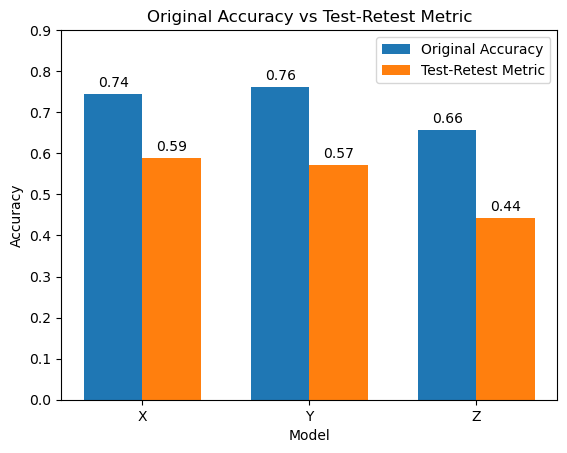

In [23]:
# Bar plot to visualize the results
models = ['X', 'Y', 'Z']

accuracy_x = df_mmlu[df_mmlu['model_name'] == 'X']['correct'].mean()
accuracy_y = df_mmlu[df_mmlu['model_name'] == 'Y']['correct'].mean()
accuracy_z = df_mmlu[df_mmlu['model_name'] == 'Z']['correct'].mean()

original_accuracies = [accuracy_x, accuracy_y, accuracy_z]
test_retest_metrics = [test_retest_metric_X, test_retest_metric_Y, test_retest_metric_Z]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, original_accuracies, width, label='Original Accuracy')
rects2 = ax.bar(x + width/2, test_retest_metrics, width, label='Test-Retest Metric')

ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Original Accuracy vs Test-Retest Metric')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

ax.set_ylim(0, 0.9)

plt.show()

### 2.7 (2 pt)

A. Using the unshuffled data: For each LM, print the distribution of the answers they give as well as the accuracy conditioned on the answer they give.

B. /Discuss:/ Describe what you observe

[bonus: not scored, but again _that sweet, sweet knowledge_] Could you think of a plausible explanation?

In [24]:
# A

mmlu_distribution_unshuffled = pd.DataFrame(df_mmlu.groupby(['model_name','result'])['result'].agg('count'))
mmlu_distribution_unshuffled['percentage'] = mmlu_distribution_unshuffled['result'] / mmlu_distribution_unshuffled.groupby('model_name')['result'].transform('sum') * 100
mmlu_distribution_unshuffled.rename(columns={'result': 'count'}, inplace=True)
print(mmlu_distribution_unshuffled)

                   count  percentage
model_name result                   
X          A        4259   36.414159
           B        2659   22.734268
           C        2409   20.596785
           D        2369   20.254788
Y          A        1072    9.165527
           B        2256   19.288646
           C        3015   25.778044
           D        5353   45.767784
Z          A        2176   18.604651
           B        2885   24.666553
           C        3237   27.676129
           D        3398   29.052668


In [25]:
models = ['X', 'Y', 'Z']
answers = ['A', 'B', 'C', 'D']

for model in models:
    print(f"Model {model} accuracy by answer:")
    df_mmlu_M = df_mmlu[df_mmlu['model_name'] == model]
    for answer in answers:
        # Conditioned on the answer given by the model
        df_mmlu_MA = df_mmlu_M[df_mmlu_M['result'] == answer]
        df_mmlu_MA_correct = df_mmlu_MA[df_mmlu_MA['correct']]
        print(f"  {answer}: {(df_mmlu_MA_correct.shape[0] / df_mmlu_MA.shape[0]) * 100:.2f} %")

Model X accuracy by answer:
  A: 36.79 %
  B: 88.45 %
  C: 100.00 %
  D: 100.00 %
Model Y accuracy by answer:
  A: 93.75 %
  B: 89.76 %
  C: 82.79 %
  D: 63.16 %
Model Z accuracy by answer:
  A: 47.61 %
  B: 65.41 %
  C: 70.34 %
  D: 72.75 %


B. /Discuss:/ We can observe that model X has a higher tendency to give A as the answer, while model Y outputs D almost half of the times, finally model Z does not have an answer that stands out.

After seeing the accuracy by answer it is easy to notice that for both X and Y, the most used answer is the least accurate, which can suggest that these models hava a bias toward that specific option. This can be seen as, when they do not know the answer they output a certain option, which makes it more common and also less accurate. For model Z, we have that A is both the less accurate and common answer.

## Task 3 (16 points): What do Questions and Answers look like for a Language Model?

While you feel pretty good about the tests you conducted so far, something still bothers you: what if the language models don't see the data like you do? Suddenly, you receive a phone call from a wise AI sage in the West, _Westoda_:

```
"Hmm, correct you are, young padawan, to question how the world is seen by large language models! Simple 'text' it is not, hmm? No, no, no! Characters and words, the way of puny humans, this is not, heh heh heh.

'Tokens', they use, yes! Mysterious and powerful, these tokens are. Expand our vocabulary, they do, beyond the simple 'a to Z'. Chunky blocks of text, they become, yes! 'Hello world', a simple phrase it may seem. But to a language model, '[24912, 2375]' it might appear, yes! Confusing, it is, hmm?

Wise, it would be, to explore these MMLU data points through the eyes of a language model, you think? Yes, yes! Much to learn, there is. The ways of the tokens, understand you must, if truly comprehend the great LMs, you wish to.
Meditate on this, you should. The force of natural language processing, strong it is. But patience, you must have, my young padawan. For only through great study and contemplation, will the mysteries of the tokens reveal themselves to you, they will. Yes, hmmm!"
```

Admittingly, Westoda at times speaks in riddles… However, he was explaining a crucial aspect of modern LMs called [Tokenization](https://learn.microsoft.com/en-us/dotnet/ai/conceptual/understanding-tokens):


“Tokens are words, character sets, or combinations of words and punctuation that are used by [language models (LMs)] to decompose text into. Tokenization is the first step in training”

Instead of characters, LMs process natural language using “tokens”. While this is useful for a number of reasons, it does at times introduce some “unintuitive” behavior…

In [26]:
# PROVIDED CODE

try:
    import tiktoken
except Exception as e:
    print('installing tiktoken package')
    
    %pip install tiktoken
    
    import tiktoken

def tokenize_text(s):
    enc = tiktoken.encoding_for_model('gpt-4o')
    tokens = enc.encode(str(s))
    return tokens

example_string = 'hello world'
print(f'humans see: "{example_string}" --> language models see: {tokenize_text(example_string)}')

humans see: "hello world" --> language models see: [24912, 2375]


### 3.1 (5 pt)

Use the provided code in the cell above to "see the world through the eyes of a language model":

A. Tokenize the questions of the original MMLU data provided in task 1: `task_1/mmlu_data/test.csv` and plot the token distribution (the frequency of each token).

B. Same as (A), but now for the answers in columns (columns "A", "B", "C", and "D").

C. Isolate the tokens for the strings "A", "B", "C", and "D", then, for their occurances in both questions and answers, print their relative distribution to each other.

**hint**
- There are a _lot_ of tokens, consider using a cutoff point and log scale
- For (c), they should sum to 1

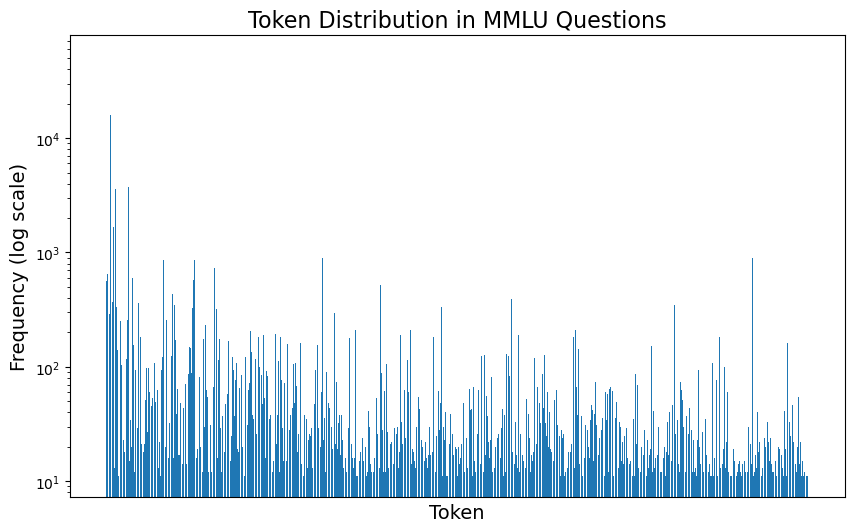

In [27]:
# A

# Folder paths
base_folder='task_1/' #already computed
mmlu_folder='mmlu_data/' #already computed

# Load the data and print the size of each dataframe
df_test = pd.read_csv(os.path.join(base_folder, mmlu_folder, 'test.csv'))

# tokenize the questions
df_test['tokens'] = df_test['question'].apply(tokenize_text)

# count the frequency of each token
token_counts = pd.Series([token for tokens in df_test['tokens'] for token in tokens]).value_counts(sort=False)
df_token_counts = token_counts.reset_index()
df_token_counts.columns = ['token', 'count']

# Plot the token distribution with a cutoff for rare tokens and log scale
cutoff = 10
df_token_counts_cutoff = df_token_counts[df_token_counts['count'] > cutoff]

plt.figure(figsize=(10, 6))
plt.bar(range(len(df_token_counts_cutoff)), df_token_counts_cutoff['count'])
plt.yscale('log')
plt.title('Token Distribution in MMLU Questions', fontsize=16)
plt.xlabel('Token', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=14)
plt.xticks([])  # Remove x-axis ticks
plt.show()

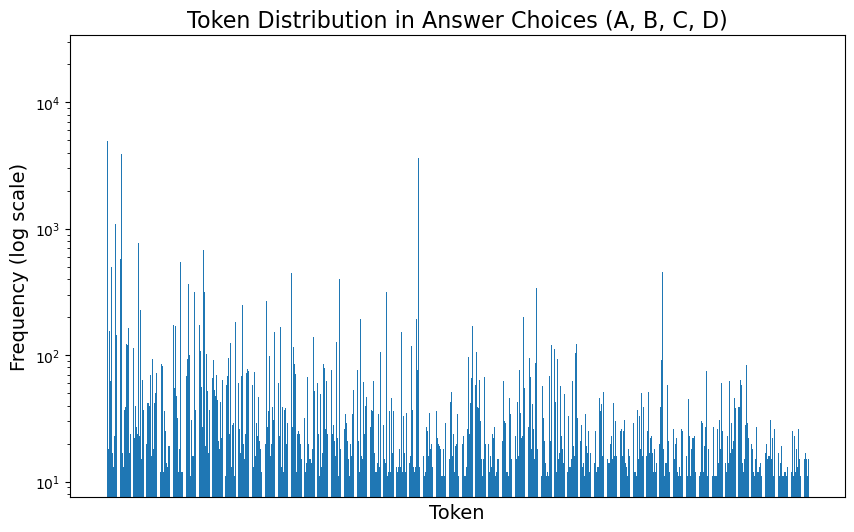

In [28]:
# B

# Tokenize answers for each result in the columns "A", "B", "C", "D" from the df_test
df_test['A_tokens'] = df_test['A'].apply(tokenize_text)
df_test['B_tokens'] = df_test['B'].apply(tokenize_text)
df_test['C_tokens'] = df_test['C'].apply(tokenize_text)
df_test['D_tokens'] = df_test['D'].apply(tokenize_text)

# combine the tokens from all answers
all_tokens = pd.Series([token for tokens in df_test['A_tokens'] for token in tokens] + \
                       [token for tokens in df_test['B_tokens'] for token in tokens] + \
                       [token for tokens in df_test['C_tokens'] for token in tokens] + \
                       [token for tokens in df_test['D_tokens'] for token in tokens])

# count the frequency of each token
token_counts = all_tokens.value_counts(sort=False)
df_token_counts = token_counts.reset_index()
df_token_counts.columns = ['token', 'count']

# Plot the token distribution with a cutoff for rare tokens and log scale
cutoff = 10
df_token_counts_cutoff = df_token_counts[df_token_counts['count'] > cutoff]

plt.figure(figsize=(10, 6))
plt.bar(range(len(df_token_counts_cutoff)), df_token_counts_cutoff['count'])
plt.yscale('log')
plt.title('Token Distribution in Answer Choices (A, B, C, D)', fontsize=16)
plt.xlabel('Token', fontsize=14)
plt.ylabel('Frequency (log scale)', fontsize=14)
plt.xticks([])  # Remove x-axis ticks
plt.show()

In [29]:
# C

# Tokenize the answers 'A', 'B', 'C' and 'D'
# For the characters 'A', 'B', 'C' and 'D', there's only one token, so we take the first token from the list !!!
tokens_A = tokenize_text('A')[0]
tokens_B = tokenize_text('B')[0]
tokens_C = tokenize_text('C')[0]
tokens_D = tokenize_text('D')[0]

# create a dict to store the total token counts
total_token_counts = {'A': 0, 'B': 0, 'C': 0, 'D': 0}

# count the frequency of each token in both the questions and answers:
for idx, row in df_test.iterrows():
    # count the frequency of each token in the questions
    question_tokens = row['tokens']
    answer_tokens = row['A_tokens'] + row['B_tokens'] + row['C_tokens'] + row['D_tokens']
    all_tokens = question_tokens + answer_tokens

    # count the frequency of each token
    total_token_counts['A'] += all_tokens.count(tokens_A)
    total_token_counts['B'] += all_tokens.count(tokens_B)
    total_token_counts['C'] += all_tokens.count(tokens_C)
    total_token_counts['D'] += all_tokens.count(tokens_D)


# Calculate the total count of tokens in the questions and answers
total_tokens = sum(total_token_counts.values())

if total_tokens == 0:
    relative_freq_A = relative_freq_B = relative_freq_C = relative_freq_D = 0
else:
    # Calculate the relative frequency of each token in the questions and answers
    relative_freq_A = total_token_counts['A'] / total_tokens
    relative_freq_B = total_token_counts['B'] / total_tokens
    relative_freq_C = total_token_counts['C'] / total_tokens
    relative_freq_D = total_token_counts['D'] / total_tokens
    
    # Print the relative frequencies
    print(f"Relative frequency of token for 'A': {relative_freq_A:.4f}")
    print(f"Relative frequency of token for 'B': {relative_freq_B:.4f}")
    print(f"Relative frequency of token for 'C': {relative_freq_C:.4f}")
    print(f"Relative frequency of token for 'D': {relative_freq_D:.4f}")

    # Ensure they sum to 1
    total_relative_freq = relative_freq_A + relative_freq_B + relative_freq_C + relative_freq_D
    print(f"Sum of relative frequencies: {total_relative_freq:.2f}")
    assert np.isclose(total_relative_freq, 1), "The relative frequencies do not sum to 1!"

Relative frequency of token for 'A': 0.7917
Relative frequency of token for 'B': 0.0602
Relative frequency of token for 'C': 0.1015
Relative frequency of token for 'D': 0.0466
Sum of relative frequencies: 1.00


### 3.2 (3 pt)

What if the number of "A", "B", "C", and "D" tokens in the question and answer pairs could influence a language model's decisions?

A. For each combined question-answers pair, compute: 
1. the number of "A", "B", "C", and "D" tokens; and
2. the total number of tokens.
3. then, group by the "correct" answer and compute the mean frequency of A, B, C, and D tokens and the total number of tokens. 
4. finally, print your results

B. /Discuss:/ What do you think of the hypothesis that the frequency of A, B, C, and D tokens could influence answers?


In [30]:
# A

# for each question-answer pair, calculate the number of 'A', 'B', 'C' and 'D' tokens
def count_tokens(row):
    # combine the question and answer tokens
    tokens = row['tokens'] + row['A_tokens'] + row['B_tokens'] + row['C_tokens'] + row['D_tokens']

    # count the number of 'A', 'B', 'C' and 'D' tokens
    count_A = tokens.count(tokens_A)
    count_B = tokens.count(tokens_B)
    count_C = tokens.count(tokens_C)
    count_D = tokens.count(tokens_D)

    total_tokens = len(tokens)

    return pd.Series({'count_A': count_A, 'count_B': count_B, 'count_C': count_C, 'count_D': count_D, 'total_tokens': total_tokens})

# apply the counting function to each question-answer pair
df_combined_token_counts = df_test.apply(count_tokens, axis=1)

# concatenate the token counts with the original test DataFrame
df_test_token_counts = pd.concat([df_test, df_combined_token_counts], axis=1)

# groub by the correct answer and calculate the mean token counts for each token
grouped_by_correct = df_test_token_counts.groupby('answer')[['count_A', 'count_B', 'count_C', 'count_D', 'total_tokens']].mean()

print(grouped_by_correct)

         count_A   count_B   count_C   count_D  total_tokens
answer                                                      
A       0.243017  0.018932  0.025140  0.013035     93.208566
B       0.231947  0.019642  0.029463  0.012709     88.863951
C       0.226410  0.018984  0.034897  0.015355     92.675879
D       0.242850  0.014566  0.030985  0.014301     92.132415


B. Looking at the token counts grouped by the correct answer, we observe unusual behaviour:
- For questions where the correct answer is "**A**," the frequency of the "**A**" token is so high, standing at **0.24**. None of the other tokens even approach this level of frequency, with the next closest being the "**C**" token at only **0.025**.
- When the correct answer is "**B**," the "**B**" token has a frequency of **0.02**. However, the "**A**" token still dominates with a frequency of **0.23**, overshadowing the expected answer token.
- For questions where the correct answer is "**C**," the frequency of the "**C**" token is **0.035**, slightly higher than for "**B**" and "**D**," yet the "**A**" token remains the most frequent at **0.23**.
- Similarly, for questions where the correct answer is "**D**," the frequency of the "**D**" token is **0.014**, while the "**A**" token is still the most frequent with a frequency of **0.24**.


This suggests that **A** is always chosen regardless of whether it's the correct answer, and this is due to the high relative frequency of **A** (79%) compared to the other tokens.

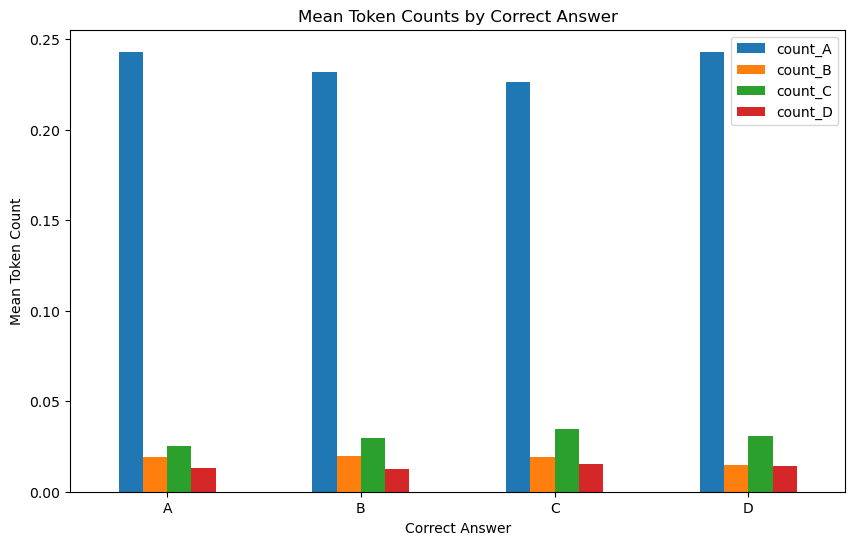

In [31]:
grouped_by_correct[['count_A', 'count_B', 'count_C', 'count_D']].plot(kind='bar', figsize=(10, 6))
plt.title('Mean Token Counts by Correct Answer')
plt.xlabel('Correct Answer')
plt.ylabel('Mean Token Count')
plt.xticks(rotation=0)
plt.show()

### 3.3 (4 pt)

Three of the most important considerations when deciding between language models are:

Quality
Costs
Speed

So far, much of your analysis has focused on quality. However, the government has indicated that they are quite concerned about both the total costs and speed as well. Specifically, it has been brought to their attention that a new `turbo` model has been launched! 

This model is both cheaper and faster than the models you evaluated so far. However, there is a catch: the context length* is much smaller than that of the other LMS. Namely, it can only process **300** tokens during inference. Meanwhile, the other models can process up to 100K tokens! 

*_The “context length” refers to the number of tokens that can be given to an LM as input._

A. Are there subjects where using the cheaper model might be problematic? I.e., where part of the question and answer(s) might not fit completely in the context?

B. /Discuss:/ Can you think of a strategy that would balance the needs of the government?

**hint**:
- An LM needs to have both the question and the different answer options in its context

Subjects where the total number of tokens exceeds the token limit:
 - college medicine
 - high school computer science
 - high school european history
 - high school statistics
 - high school us history
 - high school world history
 - professional law
 - professional medicine
 - security studies
 - virology


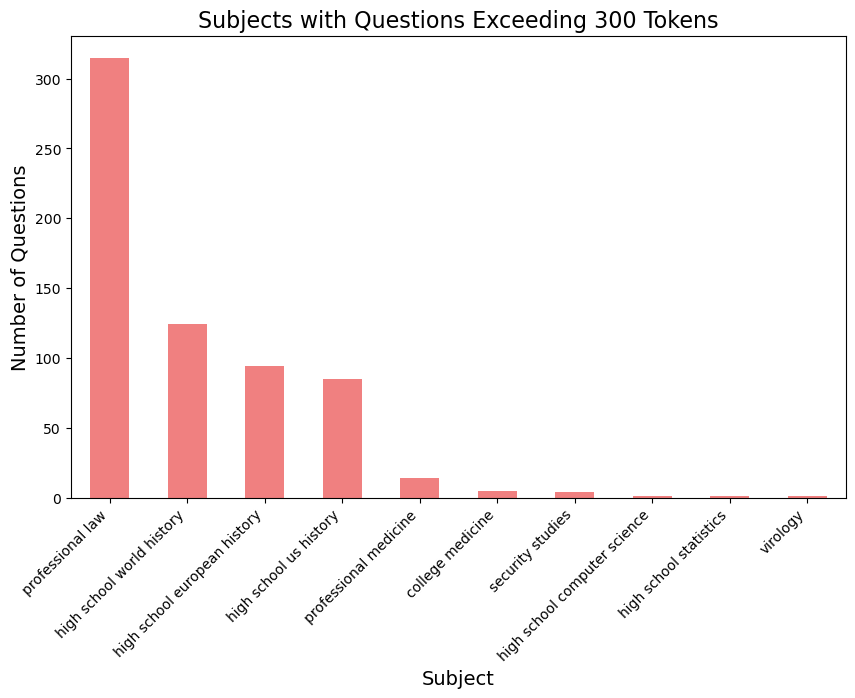

In [32]:
# A

# We want to find if there are subjects in the dataset where the total number of tokens in the questions and answers exceeds the turbo model's token limit of 300 tokens.
# Calculate the total number of tokens for each question-answer pair and check if it exceeds the token limit
df_test_token_counts['total_tokens'] = df_test_token_counts['total_tokens']
df_exceeds_token_limit = df_test_token_counts[df_test_token_counts['total_tokens'] > 300]

# Print the subjects where the total number of tokens exceeds the token limit
print("Subjects where the total number of tokens exceeds the token limit:")
for subject in df_exceeds_token_limit['subject'].unique():
    print(f" - {subject}")

# Count the number of questions for each subject where the total number of tokens exceeds the token limit
subjects_with_exceeding_tokens = df_exceeds_token_limit['subject'].value_counts()

plt.figure(figsize=(10, 6))
subjects_with_exceeding_tokens.plot(kind='bar', color='lightcoral')
plt.title('Subjects with Questions Exceeding 300 Tokens', fontsize=16)
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

B. The ideal would be to have a hybrid approach to the problem, hence for **short questions and answers** (less than 300-token), use the **turbo model**, otherwise use the larger model.

However, this approach may **not reduce much the total cost and speed** but it would indeed bring **balance**. But, for **cheaper and faster approaches**, one could **cut off** part of the question or answer to fit within the limit if it surpasses 300-token. So if the text is too long, we should **truncate it leaving only the important part of the text**. A strategy would be **preprocessing** the input by filtering out less relevant parts of the text, removing less significant tokens (e.g., words like "the," "a," or other filler words), the overall token count can be reduced, allowing the text to fit within the 300-token limit without sacrificing crucial information. This strategy would allow the government to leverage the cheaper turbo model more frequently while preserving the quality of responses where possible.


### 3.4 (4 pt)

/Discuss:/ The time has come to give your final recommendation on the use of LMs in education to the government! Taking into account everything you analyzed in all the preceding tasks (1, 2, and 3), please write a short recommendation consisting of 4 bullet points discussing your concerns.

**hint**
- Try to use the MECE framework: _Mutually Exclusive Collectively Exhaustive_

## **Final Recommendation**

1. **Fair Decision-Making**
   - **Insight:** The token distribution in both questions and answers is skewed, with certain tokens (like "A") dominating as shown in the 3.2 plot.
   - **Recommendation:** Retrain models on datasets that better represent the distribution of educational content to ensure fairness in answer selection.

2. **Handling Long Contexts**
   - **Insight:** Subjects such as Law, History, and Medicine have questions that exceed the token limit of cheaper models (e.g., the 300-token limit of the turbo model) as shown in the 3.3 plot. These subjects require a larger context to process the full question and answer set accurately.
   - **Recommendation:** Use a hybrid approach to model deployment: for shorter questions (within the 300-token limit), deploy the turbo model to save on costs and speed. For longer, more context-heavy subjects, use a more capable LM that can handle larger token contexts. Preprocessing can help reduce the input size without losing critical information, but we should take caution.

3. **Ensuring Accuracy over Cost Savings**
   - **Insight:** The turbo model offers significant cost and speed benefits but may compromise accuracy in scenarios requiring extensive context, especially in subjects with complex and lengthy questions.
   - **Recommendation:** Prioritize using models with larger context windows in critical educational applications where accuracy and comprehension of the full context are paramount, such as maturity exams or advanced topics. Otherwise, in less complex scenarios where shorter questions suffice, cost-saving measures can be applied.

4. **Balancing Speed, Cost, and Outcomes**
   - **Insight:** The trade-off between quality, speed, and cost is central to the government’s decision. Our findings suggest that while turbo models can handle simple, short-answer questions efficiently, they fall short in complex educational contexts.
   - **Recommendation:** The government should implement a model strategy where LMs are deployed based on the complexity and length of the educational material. Turbo models should be used for quick, straightforward queries, while more comprehensive models are reserved for detailed, long-form educational content. This approach will optimize cost while ensuring educational quality and accuracy.